In [1]:
import pandas as pd 
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import os
from pathlib import Path
from dotenv import load_dotenv
import tablescraper as ts


Bad key savefig.frameon in file /Users/jeff/opt/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/jeff/opt/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/jeff/opt/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.s

In [2]:
# set file path
#link to data https://www2.census.gov/programs-surveys/cps/tables/time-series/historical-income-people/p09ar.xlsx
#Credit to Buaeruo of Census and Labor Data
filepath=Path('p09ar.csv')
#read in csv to pandas csv data reader,drop nan's , reset index to prep for standardized index format
data=pd.read_csv(filepath).dropna().reset_index()
#drop unwanted data series
data=data.drop(columns=['Unnamed: 2','Unnamed: 5','index'])
#rename data series column names
data.columns=['year','male_pop','male_mean','female_pop','female_mean']
#set index to remove duplicated 
data=data.set_index(['year'])
#drop duplicated columns
data=data.drop(['2017','2013 (38)'])
#reset index to prep cod standardized index format
data=data.reset_index()
#format values in column as dtype=(int)
data['male_pop'] = data['male_pop'].str.replace(',', '').astype(int)
#format values in column as dtype=(int)
data['male_mean'] = data['male_mean'].str.replace(',', '').astype(int)
#format values in column as dtype=(int)
data['female_pop'] = data['female_pop'].str.replace(',', '').astype(int)
#format values in column as dtype=(int)
data['female_mean'] = data['female_mean'].str.replace(',','').astype(int)
#Create values to show sum of population
data['pop_total']=(data['female_pop'])+(data['male_pop'])
#just for fun we did the gender specific to test if they mattered
data['male_total']=(data['male_pop'])*(data['male_mean'])
#just for fun we did the gender specific to test if they mattered
data['female_total']=(data['female_pop'])*(data['female_mean'])
#show consolidated population and income to express the avg income 
data['avg_income']=((data['female_total'])+(data['male_total']))/(data['pop_total'])
#take only columns needed for visual representation
data=data[['year','pop_total','avg_income']]
#setup standardized base index for all data sets , Kinda cheating but it works'
cleanindex=pd.date_range(start='12/31/1967', periods=53, freq='12M')
#setup standardized base index for all data sets 
cleanindex=cleanindex.sort_values(ascending=False)
#   ***Important***
#setup standardized base index for ****15-24*** 
clean1index=pd.date_range(start='12/31/1974', periods=46, freq='12M')
#setup standardized base index for all data sets
clean1index=clean1index.sort_values(ascending=False)


#start slicing different data sets from within main dataset



#   ***15+***
fifteen_onward=data[0:53].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(fifteen_onward)

#   ***15-24***
fifteen_to_twentyfour=data[53:99].set_index(clean1index).drop(columns='year').sort_index(ascending=True)
#print(fifteen_to_twentyfour)

#   ***25-34***
twentyfive_to_thirtyfour=data[99:152].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(twentyfive_to_thirtyfour)

#   ***35-44***
thirtyfive_to_fortyfour=data[152:205].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(thirtyfive_to_fortyfour)

#   ***45-54***
fourtyfive_to_fiftyfour=data[205:258].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(fourtyfive_to_fiftyfour)

#   ***55-64***
fiftyfive_to_sixtyfour=data[258:311].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(fiftyfive_to_sixtyfour)

#   ***65+***
sixtyfive_to_older=data[311:364].set_index(cleanindex).drop(columns='year').sort_index(ascending=True)
#print(sixtyfive_to_seventyfour)


SP_CumSum  Real_GDP_Cum_Sum  25-34pop change  \
SP_CumSum          1.000000          0.896582         0.381003   
Real_GDP_Cum_Sum   0.896582          1.000000         0.601521   
25-34pop change    0.381003          0.601521         1.000000   
35-44pop change    0.614662          0.772283         0.844697   
45-54pop change    0.831110          0.957561         0.566761   
55-64pop change    0.812076          0.957124         0.607656   
65+ pop change     0.826953          0.959401         0.780999   

                  35-44pop change  45-54pop change  55-64pop change  \
SP_CumSum                0.614662         0.831110         0.812076   
Real_GDP_Cum_Sum         0.772283         0.957561         0.957124   
25-34pop change          0.844697         0.566761         0.607656   
35-44pop change          1.000000         0.829035         0.657422   
45-54pop change          0.829035         1.000000         0.873761   
55-64pop change          0.657422         0.873761         1.000000   
65+ pop change           0.836345         0.890812         0.940227   

                  65+ pop change  
SP_CumSum               0.826953  
Real_GDP_Cum_Sum        0.959401  
25-34pop change         0.780999  
35-44pop change         0.836345  
45-54pop change         0.890812  
55-64pop change         0.940227  
65+ pop change          1.000000

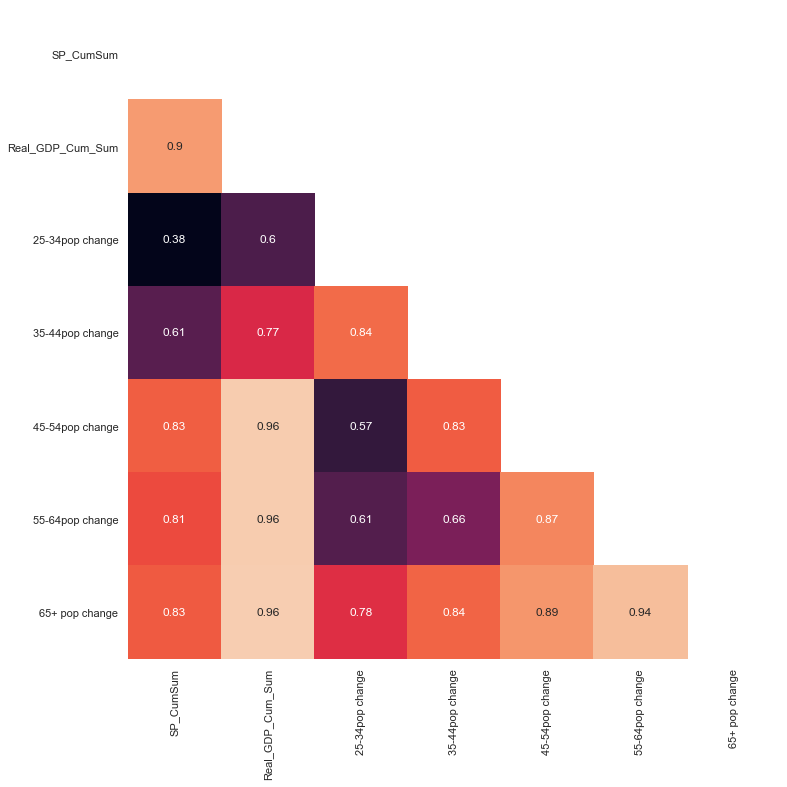

In [37]:
higestearnersplot=pd.DataFrame()
popchange=pd.DataFrame()
higestearnersplot['25-34']=twentyfive_to_thirtyfour['avg_income']
popchange['25-34pop change']=twentyfive_to_thirtyfour['pop_total'].pct_change().cumsum()
higestearnersplot['35-44']=thirtyfive_to_fortyfour['avg_income']
popchange['35-44pop change']=thirtyfive_to_fortyfour['pop_total'].pct_change().cumsum()
higestearnersplot['45-54']=fourtyfive_to_fiftyfour['avg_income']
popchange['45-54pop change']=fourtyfive_to_fiftyfour['pop_total'].pct_change().cumsum()
higestearnersplot['55-64']=fiftyfive_to_sixtyfour['avg_income']
popchange['55-64pop change']=fiftyfive_to_sixtyfour['pop_total'].pct_change().cumsum()
higestearnersplot['65+']=sixtyfive_to_older['avg_income']
popchange['65+ pop change']=sixtyfive_to_older['pop_total'].pct_change().cumsum()
higestearnersplot['15-24']=fifteen_to_twentyfour['avg_income']
popchange['15-24pop change']=fifteen_to_twentyfour['pop_total'].pct_change().cumsum()

totalpopdata=pd.concat([popchange,higestearnersplot,final,finalgdp],join='outer',axis='columns')
definedpop=totalpopdata[['SP_CumSum','Real_GDP_Cum_Sum','25-34pop change','35-44pop change','45-54pop change','55-64pop change','65+ pop change']]
(higestearnersplot.hvplot.line(line_width=4))
matrix=np.triu(gdpcor)
gdpcor=definedpop.corr()
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(gdpcor, vmin=.5, vmax=1,annot=True,cbar=False,square=True,mask=matrix)
gdpcor

<AxesSubplot:ylabel='None'>

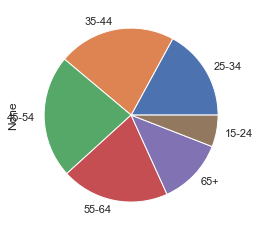

In [38]:
base=higestearnersplot.sum().sum()
percents=(higestearnersplot.sum()/base)*100
percents.plot.pie()

In [4]:
#importing libararies to scrape tables from websites
#  ***MUST RENAME FILE to "spdata.csv" AND CHANGE IN FILEPATH BELOW***
import tablescraper as ts
ts.main('https://www.multpl.com/inflation-adjusted-s-p-500/table/by-year')

[+] Found a total of 1 tables.
[+] Saving table-1


In [5]:
#Change File path to file name change
filepath=Path('spdata.csv')
# read in file in to csv pandas
spdata=pd.read_csv(filepath,infer_datetime_format=True)
#Bring in the base index 
cleanindex=pd.date_range(start='12/31/1966', periods=54, freq='12M')
#sort index value to standardized format 
cleanindex=cleanindex.sort_values(ascending=False)
#drop unwanted columns
spdata=spdata.drop(columns='Unnamed: 0')
#splice data for specific dates needed
spdata=spdata[2:56].drop(columns='Date').set_index(cleanindex)
#rename column names
spdata.columns=['SP_Close']
#format column values dtypes=float
spdata['SP_Close']=spdata['SP_Close'].str.replace(',', '').astype(float)
#sort pct change index values
spdata1=spdata.sort_index(ascending=True)
#merge pct change column into the original dataframe
spdata['SP_Pct_Change']=spdata1.pct_change()
#Gotta make sure that index is sorted
spdata=spdata.sort_index(ascending=True)
#add cumulative sum of pct_change column to origianl dataframe
spdata['SP_CumSum']=(spdata['SP_Pct_Change']+1).cumprod()
#gotta resort again and drop any unnesscesary values
final=spdata.sort_index(ascending=True).dropna()
#display that data dog
final

SP_Close  SP_Pct_Change  SP_CumSum
1967-12-31    725.97       0.085806   1.085806
1968-12-31    746.30       0.028004   1.116213
1969-12-31    622.31      -0.166140   0.930766
1970-12-31    611.85      -0.016808   0.915121
1971-12-31    654.67       0.069984   0.979165
1972-12-31    723.95       0.105824   1.082785
1973-12-31    537.21      -0.257946   0.803485
1974-12-31    362.76      -0.324733   0.542567
1975-12-31    453.77       0.250882   0.678687
1976-12-31    462.17       0.018512   0.691250
1977-12-31    376.12      -0.186187   0.562549
1978-12-31    380.26       0.011007   0.568741
1979-12-31    371.29      -0.023589   0.555325
1980-12-31    398.20       0.072477   0.595573
1981-12-31    324.00      -0.186339   0.484595
1982-12-31    384.32       0.186173   0.574813
1983-12-31    425.35       0.106760   0.636180
1984-12-31    423.67      -0.003950   0.633667
1985-12-31    494.81       0.167914   0.740069
1986-12-31    619.56       0.252117   0.926653
1987-12-31    563.95      -0.089757   0.843479
1988-12-31    613.87       0.088518   0.918142
1989-12-31    695.08       0.132292   1.039605
1990-12-31    629.88      -0.093802   0.942088
1991-12-31    784.78       0.245920   1.173766
1992-12-31    794.99       0.013010   1.189037
1993-12-31    842.69       0.060001   1.260380
1994-12-31    806.29      -0.043195   1.205938
1995-12-31   1036.53       0.285555   1.550299
1996-12-31   1254.43       0.210221   1.876204
1997-12-31   1552.79       0.237845   2.322450
1998-12-31   1979.75       0.274963   2.961038
1999-12-31   2199.82       0.111161   3.290188
2000-12-31   1986.85      -0.096812   2.971657
2001-12-31   1676.99      -0.155955   2.508211
2002-12-31   1284.22      -0.234211   1.920760
2003-12-31   1592.83       0.240309   2.382336
2004-12-31   1613.67       0.013084   2.413506
2005-12-31   1679.66       0.040894   2.512205
2006-12-31   1832.64       0.091078   2.741011
2007-12-31   1701.40      -0.071613   2.544720
2008-12-31   1067.81      -0.372393   1.597083
2009-12-31   1350.63       0.264860   2.020087
2010-12-31   1517.05       0.123217   2.268995
2011-12-31   1494.57      -0.014818   2.235372
2012-12-31   1674.51       0.120396   2.504502
2013-12-31   2029.26       0.211853   3.035088
2014-12-31   2260.47       0.113938   3.380900
2015-12-31   2109.38      -0.066840   3.154921
2016-12-31   2440.34       0.156899   3.649925
2017-12-31   2931.69       0.201345   4.384819
2018-12-31   2698.15      -0.079661   4.035522
2019-12-31   3310.01       0.226770   4.950658

In [6]:
import tablescraper as ts
ts.main('https://www.multpl.com/us-real-gdp-growth-rate/table/by-year')
from pathlib import Path
import pandas as pd

[+] Found a total of 1 tables.
[+] Saving table-1


In [7]:
#set filepath name to input name
filepath=Path('gdpdata.csv')
#read in csv file to pandas
gdpdata=pd.read_csv(filepath,infer_datetime_format=True)
#Bring in the base index 
cleanindex=pd.date_range(start='12/31/1967', periods=53, freq='12M')
#set up index for base formating sort type
cleanindex=cleanindex.sort_values(ascending=False)
#sloppy attempt at showing of data ninja skills
#drop unused column data
gdpdata=gdpdata.drop(columns='Unnamed: 0')
#set base index 
gdpdata=gdpdata[1:54].drop(columns='Date').set_index(cleanindex)
#rename columns
gdpdata.columns=['Real_GDP_Growth_Rate']
#format values 
gdpdata['Real_GDP_Growth_Rate']=gdpdata['Real_GDP_Growth_Rate'].str.replace('%', '').astype(float)
#sort index 
gdpdata=gdpdata.sort_index(ascending=True)
#add column of cumulate sum of percent change
gdpdata['Real_GDP_Cum_Sum']=((gdpdata['Real_GDP_Growth_Rate']*.01)+1).cumprod()-1
#set final variable name
finalgdp=gdpdata
#display that data dog
finalgdp.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

<AxesSubplot:xlabel='Series Name', ylabel='Series Name'>

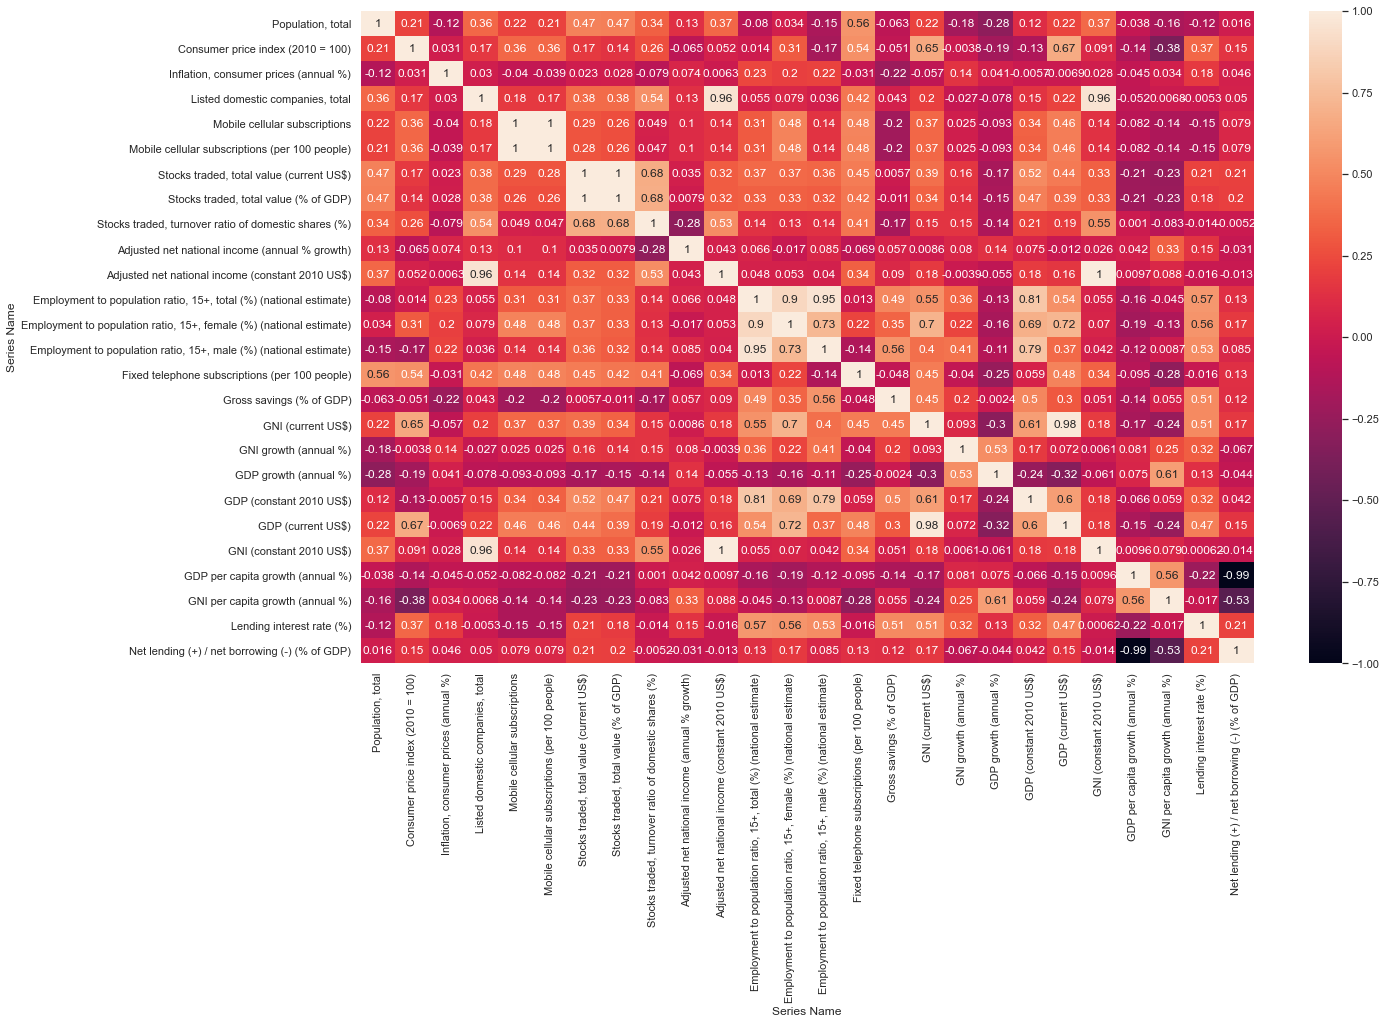

In [8]:
from pathlib import Path
import pandas as pd

filepath=Path('world_data_final.csv')
worlddata=pd.read_csv(filepath)
worlddata=worlddata[:26]
worlddata=worlddata.drop(columns=['Country Name','Country Code','Series Code']).swapaxes(axis1='columns',axis2='rows',copy=True)
worlddata.columns=worlddata.iloc[0]
worlddata = worlddata.iloc[1:]
cleanindex=pd.date_range(start='12/31/1967', periods=53, freq='12M')
cleanindex=cleanindex.sort_values(ascending=True)
worlddata=worlddata.set_index(cleanindex)
worlddata=worlddata.fillna(0).astype('float64')
totalcorr=worlddata.pct_change().corr()
sns.set_theme(style='whitegrid')
fig, ax = plt.subplots(figsize=(20, 12))
sns.heatmap(totalcorr, vmin=-1, vmax=1,annot=True)


In [25]:
#                               ***Segregate Data***
#   ****POPULATION TOTALS****
#       ***Percent change cumulative sums***
# create df to hold values
population_total=pd.DataFrame()
# format specific column into INT format
population_total['U.S Pop Totals']=worlddata['Population, total'].astype(int)/100000000-1
# adding in the cumulative sum of percent change into the dataframe
population_total['Pop Cum Sum Pct']=(population_total.pct_change()+1).cumprod()
#population pct change
population_total['pop_pct_change']=worlddata['Population, total'].astype(int).pct_change()*100
# check that data son
#population_total['pop_change_derivitive']=population_total['pop_pct_change'].astype(float).pct_change()*100
population_total.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [26]:
#   ****Employment to Population Ratio TOTALS****
#       ***MALE/FEMALE Seperated Values***
# create df to hold values
emp_to_pop_ratio=pd.DataFrame()
# format 15+ ratio into a rounded formate format and stack in dataframe
emp_to_pop_ratio['Emp to pop ratio']=worlddata['Employment to population ratio, 15+, total (%) (national estimate)'].round(1)
# format population ratio MALE BASED into a rounded formate format and stack in dataframe
emp_to_pop_ratio['Emp to pop ratio, MALE']=worlddata['Employment to population ratio, 15+, male (%) (national estimate)'].round(1)
# format population ratio FEMALE BASED into a rounded formate format and stack in dataframe
emp_to_pop_ratio['Emp to pop ratio, FEMALE']=worlddata['Employment to population ratio, 15+, female (%) (national estimate)'].round(1)
# check that data son
emp_to_pop_ratio.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [31]:
#   ****CONSUMER PRICE INFLATION & CONSUMER PRICES****
#       ***INFLATION *INFLATION * CONSUMER PRICE INDEX***
# create df to hold values
inf_con_price=pd.DataFrame()
# format 15+ ratio into a rounded formate format and stack in dataframe
inf_con_price['Inflation cum sum']=worlddata['Inflation, consumer prices (annual %)'].round(2)
inf_con_price['Inflation']=worlddata['Inflation, consumer prices (annual %)'].round(2)
# format population ratio MALE BASED into a rounded formate format and stack in dataframe
inf_con_price['Consumer Price Index']=worlddata['Consumer price index (2010 = 100)'].round(2)
# check that data son
inf_con_price.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [12]:
# #   ****MOBILE SUBSCRIPTIONS****
# #       ***Cellular Subscriptions total, per 100, fixed landlines subscriptions per 100***
# # create df to hold values
# phone_data=pd.DataFrame()
# # format 15+ ratio into a rounded formate format and stack in dataframe
# phone_data['Total Cell Subs']=worlddata['Mobile cellular subscriptions'].round(1)
# # format population ratio MALE BASED into a rounded formate format and stack in dataframe
# phone_data['Cell / 100ppl']=worlddata['Mobile cellular subscriptions (per 100 people)'].round(1)
# # format population ratio FEMALE BASED into a rounded formate format and stack in dataframe
# phone_data['Landline / 100ppl']=worlddata['Fixed telephone subscriptions (per 100 people)'].round(1)
# # check that data son
# phone_data.hvplot()


:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [13]:
# #   ****MOBILE SUBSCRIPTIONS****
# #       ***Cellular Subscriptions total, per 100, fixed landlines subscriptions per 100***
# # create df to hold values
# phone_data=pd.DataFrame()
# # format 15+ ratio into a rounded formate format and stack in dataframe
# phone_data['Total Cell Subs']=worlddata['Mobile cellular subscriptions'].round(1).pct_change()
# # format population ratio MALE BASED into a rounded formate format and stack in dataframe
# phone_data['Cell / 100ppl']=worlddata['Mobile cellular subscriptions (per 100 people)'].round(1).pct_change()
# # format population ratio FEMALE BASED into a rounded formate format and stack in dataframe
# phone_data['Landline / 100ppl']=worlddata['Fixed telephone subscriptions (per 100 people)'].round(1).pct_change()
# # check that data son
# phone_data.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [14]:
# #   ****MARKET DATA/DOMESTIC****
# #       ***total us compnaies, market cap of stocks, percent of gdp traded, turnover ratio of domestic stocks.***
# # create df to hold values
# market_data=pd.DataFrame()
# # format Total US companies  into a integer formate format and stack in dataframe
# market_data['Total US Companies']=worlddata['Listed domestic companies, total'].astype(int)
# # format Total US companies and their value into integer form and stack into dataframe
# market_data['Total Value US Stocks']=worlddata['Stocks traded, total value (current US$)'].astype(int)
# # format population Stock value in percentageed of GDP  into a rounded formate format and stack in dataframe
# market_data['Stock Values (%) of GDP']=worlddata['Stocks traded, total value (% of GDP)'].round(1)
# # Format Stock turnover Ratio into rounded by 2 and stack in dataframe
# market_data['Domestic Stock Turnover']=worlddata['Stocks traded, turnover ratio of domestic shares (%)'].round(1)
# # check that data son
# market_data.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [33]:
# # **** ADJUSDSTE NET NATIOIN INCOME****
# adj_net_national=pd.DataFrame()
# #Formate the adjusted net nation income and stack into dataframe
# adj_net_national['ADJ Net National Inc %']=(worlddata['Adjusted net national income (annual % growth)']).round(2)
# #format the adjusted net national income to be constant adjusted
# adj_net_national['ADJ Net National Inc(2010 Constant)']=worlddata['Adjusted net national income (constant 2010 US$)'].astype(int)
# adj_net_national

ADJ Net National Inc %  ADJ Net National Inc(2010 Constant)
1967-12-31                    0.00                                    0
1968-12-31                    0.00                                    0
1969-12-31                    0.00                                    0
1970-12-31                    0.00                        4283664465450
1971-12-31                    2.69                        4398926913883
1972-12-31                    5.50                        4641086218935
1973-12-31                    5.42                        4892774432892
1974-12-31                   -4.17                        4688550141884
1975-12-31                   -0.32                        4673743185683
1976-12-31                    5.01                        4907756250822
1977-12-31                    3.99                        5103679251743
1978-12-31                    5.11                        5364302847791
1979-12-31                   -0.43                        5340979016838
1980-12-31                   -2.30                        5217872793897
1981-12-31                    4.05                        5428994785476
1982-12-31                    1.13                        5490473114799
1983-12-31                    3.23                        5667691841316
1984-12-31                    8.01                        6121907888857
1985-12-31                    4.23                        6380946613424
1986-12-31                    3.47                        6602610217590
1987-12-31                    3.62                        6841309578536
1988-12-31                    5.79                        7237441106361
1989-12-31                    2.31                        7404666918429
1990-12-31                    1.32                        7502317431731
1991-12-31                    0.35                        7528219551263
1992-12-31                    3.50                        7791973318957
1993-12-31                    2.32                        7972411767670
1994-12-31                    4.49                        8330765688322
1995-12-31                    3.35                        8609931069242
1996-12-31                    4.36                        8984990141547
1997-12-31                    5.48                        9477104158877
1998-12-31                    5.89                       10035221792077
1999-12-31                    4.12                       10448468734501
2000-12-31                    3.97                       10863342540468
2001-12-31                    1.44                       11019896557411
2002-12-31                    1.56                       11191635986268
2003-12-31                    2.14                       11431117707409
2004-12-31                    3.67                       11850383577606
2005-12-31                    3.04                       12211084722728
2006-12-31                    3.60                       12650872563739
2007-12-31                    0.24                       12681528903651
2008-12-31                   -2.94                       12308977226961
2009-12-31                   -1.26                       12154368409017
2010-12-31                    4.35                       12683140922544
2011-12-31                    2.25                       12968436587597
2012-12-31                    3.85                       13467284398354
2013-12-31                    1.34                       13647224238666
2014-12-31                    3.52                       14127295336366
2015-12-31                    3.56                       14629951296243
2016-12-31                    0.86                       14755809170013
2017-12-31                    2.15                       15072841425947
2018-12-31                    2.41                       15435668268186
2019-12-31                    0.00                                    0

In [16]:
#lending and Gross Savings data
# create df to hold values
lend_save=pd.DataFrame()
# format Total US companies  into a integer formate format and stack in dataframe
lend_save['Lending Int. Rate']=worlddata['Lending interest rate (%)'].round(2)
# format Total US companies and their value into integer form and stack into dataframe
lend_save['Net lend/ net borrow']=worlddata['Net lending (+) / net borrowing (-) (% of GDP)'].round(2)
# format population Stock value in percentageed of GDP  into a rounded formate format and stack in dataframe
lend_save['Gross Savings (%) of GDP']=worlddata['Gross savings (% of GDP)'].round(2)
# check that data son
lend_save.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [17]:
#lending and Gross Savings data
# create df to hold values
lend_save=pd.DataFrame()
# format Total US companies  into a integer formate format and stack in dataframe
lend_save['Lending Int. Rate']=worlddata['Lending interest rate (%)'].round(2)
# format Total US companies and their value into integer form and stack into dataframe
lend_save['Net lend/ net borrow']=worlddata['Net lending (+) / net borrowing (-) (% of GDP)'].round(2)
# format population Stock value in percentageed of GDP  into a rounded formate format and stack in dataframe
lend_save['Gross Savings (%) of GDP']=worlddata['Gross savings (% of GDP)'].round(2)
# check that data son
lend_save.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [18]:
# GPD STATISTICAL DATA
# create df to hold values
gdp_data=pd.DataFrame()
# format Total US companies  into a integer formate format and stack in dataframe
gdp_data['Current GDP']=worlddata['GDP (current US$)'].astype(int)
# format Total US companies and their value into integer form and stack into dataframe
gdp_data['GDP yearly % growth']=worlddata['GDP growth (annual %)'].round(2)
# format population Stock value in percentageed of GDP  into a rounded formate format and stack in dataframe
gdp_data['Constant 2010 GDP']=worlddata['GDP (constant 2010 US$)'].astype(int)
# Format Stock turnover Ratio into rounded by 2 and stack in dataframe
gdp_data['GDP /capita growth']=worlddata['GDP per capita growth (annual %)'].round(2)
# check that data son
gdp_data.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [19]:
#GNI STATISTICAL DATA
# create df to hold values
gni_data=pd.DataFrame()
# format Total US companies  into a integer formate format and stack in dataframe
gni_data['Current GNI']=worlddata['GNI (current US$)'].astype(int)
# format Total US companies and their value into integer form and stack into dataframe
gni_data['GNI yearly % growth']=worlddata['GNI growth (annual %)'].round(2)
# format population Stock value in percentageed of GDP  into a rounded formate format and stack in dataframe
gni_data['Constant 2010 GNI']=worlddata['GNI (constant 2010 US$)'].astype(int)
# Format Stock turnover Ratio into rounded by 2 and stack in dataframe
gni_data['GNI /capita growth']=worlddata['GNI per capita growth (annual %)'].round(2)
# check that data son
gni_data.hvplot()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

KeyError: 'pop_change_derivitive'